## Course Project
### Student name: Anh D Mai Ho
### The project is about investigating the correlation between remote work and travel rates via number of flights. 

The attributes of the wanted datasets:
1. Historical data for flights from 2019 to current date
2. Historical data for flight/hotal prices from 2019 to current date
3. Remote work survey

#### I wasn't able to obtain the second data set, so I'll use the report from other sources.
### Approach
* (Dataset 1) Observe to see the travel rate
* (Dataset 2) I wanted to find a factor which it could have a correlation between remote work and travel rate such as hotel prices during weekday, flight fare during weekday, number of remote work, but I couldn't find (the exact word is afford, these datasets are being sold, not for free) them. I use report from other sources to show the trend of remote work recently.
* (Dataset 3) Another alternative, but really full of assumption, is to see how remote workers and their employers think about this, and the result is surprising

#### I have my comments everywhere using Markdown. However, if you're only interested in the final result, then you should scroll to the last cell!

## Dependencies

In [70]:
%matplotlib inline 
import pandas as pd
import numpy as np
import pandas as p
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## Historical data for flights from 2019 to current date
### Flightradar24 
The total flights = commercial flight + business jet flights + private flights + gliders + helicopter flights + ambulance flights + government flights + some military flights + drones


In [71]:
total_num_of_flight = pd.read_csv('total-number-of-flights.csv')
total_num_of_flight

,DateTime,2022 Number of flights,2022 7-day moving average,2021 7-day moving average,2020 7-day moving average,2019 7-day moving average
0,1/1/2022,112178.0,143650.0,127803.0,164362,149020.0
1,1/2/2022,143753.0,143583.0,126909.0,165769,150190.0
2,1/3/2022,161499.0,144735.0,125859.0,165403,150656.0
3,1/4/2022,168913.0,147016.0,126436.0,164985,152503.0
4,1/5/2022,164358.0,148804.0,125693.0,166528,153786.0
...,...,...,...,...,...,...
361,12/27/2022,NaN,NaN,155327.0,130484,162603.0
362,12/28/2022,NaN,NaN,150982.0,129587,161045.0
363,12/29/2022,NaN,NaN,145823.0,127731,160362.0
364,12/30/2022,NaN,NaN,141828.0,126248,159605.0


### Let's look into the dataset

The columns I'm using are: 
* DateTime
* 2022 Numbers of flights
* 2022 7-day moving average
* 2021 7-day moving average
* 2020 7-day moving average
* 2019 7-day moving average



#### No missing date from 01/01/2022 - 12/31/2022, the next move is to see if there is any duplicate date

In [72]:
total_num_of_flight['DateTime'].value_counts()

3/1/2022      2
1/1/2022      1
8/30/2022     1
9/7/2022      1
9/6/2022      1
             ..
5/1/2022      1
4/30/2022     1
4/29/2022     1
4/28/2022     1
12/31/2022    1
Name: DateTime, Length: 365, dtype: int64

####  if one of '3/1/2022/ is NaN then I'll remove it, if not then I will need to replace with a mean value from previous data

In [73]:
total_num_of_flight[total_num_of_flight['DateTime'] == '3/1/2022']

,DateTime,2022 Number of flights,2022 7-day moving average,2021 7-day moving average,2020 7-day moving average,2019 7-day moving average
59,3/1/2022,197682.0,187602.0,152684.0,176346,174484.0
60,3/1/2022,NaN,NaN,NaN,176520,NaN


In [74]:
#remove the 60th
total_num_of_flight = total_num_of_flight.drop(60)

In [75]:
total_num_of_flight[total_num_of_flight['DateTime'] == '3/1/2022']

,DateTime,2022 Number of flights,2022 7-day moving average,2021 7-day moving average,2020 7-day moving average,2019 7-day moving average
59,3/1/2022,197682.0,187602.0,152684.0,176346,174484.0


#### Check other columns if there are any missing values

There are missing values related to the year of 2022. In my opinion, I think this makes sense because the year of 2022 is not completed yet, but lets print out the rows which have missing values to see

In [76]:
print(total_num_of_flight['2022 Number of flights'].isnull().sum())
print(total_num_of_flight['2022 7-day moving average'].isnull().sum())
print(total_num_of_flight['2021 7-day moving average'].isnull().sum())
print(total_num_of_flight['2020 7-day moving average'].isnull().sum())
print(total_num_of_flight['2019 7-day moving average'].isnull().sum())
total_num_of_flight[total_num_of_flight.isna().any(axis=1)]

27
27
0
0
0


,DateTime,2022 Number of flights,2022 7-day moving average,2021 7-day moving average,2020 7-day moving average,2019 7-day moving average
339,12/5/2022,NaN,NaN,183153.0,147532,180710.0
340,12/6/2022,NaN,NaN,179078.0,146949,185012.0
341,12/7/2022,NaN,NaN,177509.0,147978,185989.0
342,12/8/2022,NaN,NaN,175837.0,148356,185633.0
343,12/9/2022,NaN,NaN,174548.0,149220,184350.0
344,12/10/2022,NaN,NaN,172463.0,150100,182914.0
345,12/11/2022,NaN,NaN,169837.0,149820,182335.0
346,12/12/2022,NaN,NaN,170899.0,147451,182130.0
347,12/13/2022,NaN,NaN,174499.0,146152,180801.0
348,12/14/2022,NaN,NaN,174822.0,146018,178143.0


### I'm done with preprocessing this dataset, next step is to graph it using ScalarMappable

Text(0.5, 1.0, 'Number of flights per day')

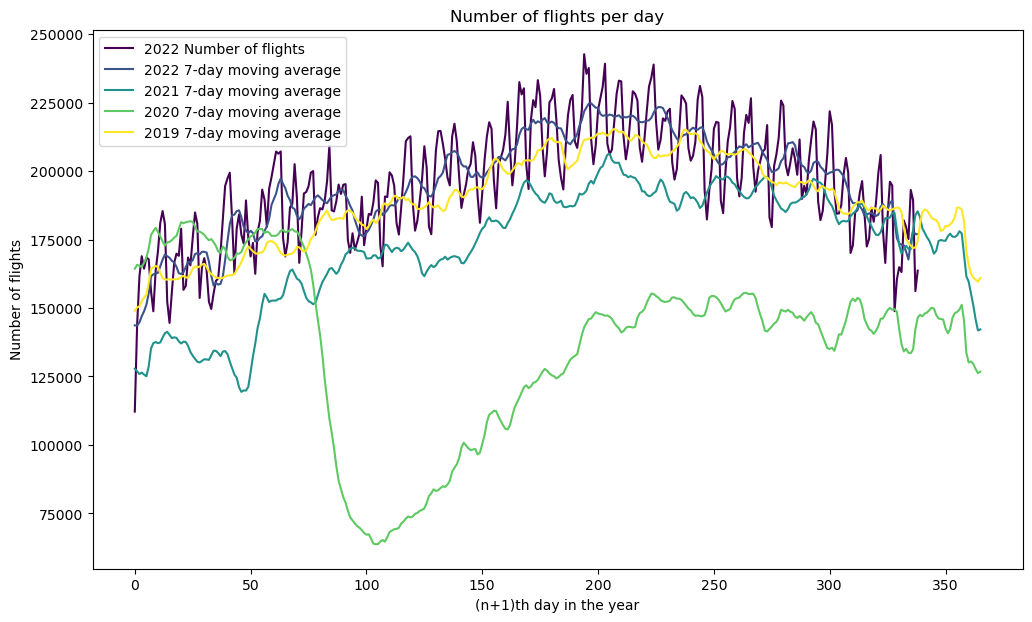

In [77]:
# Define mappable 
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=total_num_of_flight.index.min(),vmax=total_num_of_flight.index.max()))

total_num_of_flight.plot(legend=False, colormap='viridis', figsize=(12,7));
plt.legend()
plt.xlabel('(n+1)th day in the year')
plt.ylabel('Number of flights')
plt.title('Number of flights per day')
#cbar = plt.colorbar(sm);
# Change the numeric ticks into ones that match the x-axis
#cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%m/%d/%Y'))

### Comment on the number of flights

* We can observe that number of flights has drastically gone down in mid-2020 because of Covid-19. The trend is then slowly going up until the rest of the year, and it finally recovers in the third quarter of 2021 to where it was in 2019. It then continues to go up and 2022 is currently the busiest year for flights

## Remote working study from other sources

* In the first quarter of 2022, nearly 25% of job posting at the 50,000 largest companies in the U.S and Canada were for permanently remote positions, according to the job listing service Ladders. That's up from a mere 4% before the pandemic [1]

### Airbnb
* The third quarter of 2021, almost half of the nights booked on its platform were for stays of longer than seven days [2]

### Guesty
* Reservations for stays of 14 days or longer increased by 33% in 2021 and by a total of 121% since 2019 [3]

### Google
* 74% of business travelers find the idea of blended travel appealing and 50% of travelers have already taken a blended trip [4]
* This report is one of the reasons why I want to know how remote workers and their employer think about remote working. If both parties show a positive sign that remote working have been boosting the business, then the correlation between remote working and number of flights is stronger

# Remote Working Review from Kaggle

Survey results of 1,500 remote workers from the Australian state of New South Wales, taken in August-September 2020 and March-April 2021, which aimed to capture the shift in remote work experiences and attitudes during different stages of the COVID-19 pandemic and gain insights on its long term implications.

I won't replace any missing value in this dataset, I want to know how many people have chosen not to answer as well


In [78]:
rw_2020 = pd.read_csv('2020_rws.csv')
rw_2021 = pd.read_csv('2021_rws.csv')

In [79]:
rw_2020

,Response ID,What year were you born?,What is your gender?,Which of the following best describes your industry?,Which of the following best describes your industry? (Detailed),Which of the following best describes your current occupation?,Which of the following best describes your current occupation? (Detailed),How many people are currently employed by your organisation?,Do you manage people as part of your current occupation?,Which of the following best describes your household?,...,Compare remote working to working at your employer’s workplace. Select the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employer’s workplace. Select the worst aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employer’s workplace. Select the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employer’s workplace. Select the worst aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employer’s workplace. Select the best aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employer’s workplace. Select the worst aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employer’s workplace. Select the best aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employer’s workplace. Select the worst aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employer’s workplace. Select the best aspect of remote working for you - Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employer’s workplace. Select the worst aspect of remote working for you - Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing ; My daily expenses ; My personal relationships ; My job satisfaction
0,1,1972,Female,Manufacturing,Food Product Manufacturing,Clerical and administrative,Other Clerical and Administrative,Between 20 and 199,No,Couple with no dependent children,...,Managing my personal commitments,My opportunities to socialise,Preparing for work and commuting,My working relationships,Managing my personal commitments,The number of hours I work,My job satisfaction,The number of hours I work,Managing my personal commitments,My opportunities to socialise
1,2,1972,Male,Wholesale Trade,Other Goods Wholesaling,Managers,"Chief Executives, General Managers and Legisla...",Between 1 and 4,Yes,Couple with dependent children,...,Preparing for work

In [80]:
rw_2021

,Response ID,What year were you born?,What is your gender?,"How long have you been in your current job? If you have more than one job, please answer all questions for your main job.",Which of the following best describes your industry?,Which of the following best describes your current occupation?,How many people are currently employed by your organisation?,Which of the following best describes your household?,Metro or Regional,"Thinking about your current job, how much of your work time did you spend working remotely in the last quarter of last year? This means October-December 2020 If you work a 5 day week, each day of remote working equals 20% of your time.",...,How strongly do you agree or disagree with the following statements? - Offering remote work helps me retain employees,How strongly do you agree or disagree with the following statements? - Offering remote work helps me to recruit employees,How strongly do you agree or disagree with the following statements? - My team works well together when they work remotely,How strongly do you agree or disagree with the following statements? - I find it easy to manage employees remotely (e.g. tasking and monitoring progress),How strongly do you agree or disagree with the following statements? - I find it easy to manage poor performers remotely,How strongly do you agree or disagree with the following statements? - I feel well-prepared to manage employees remotely,How strongly do you agree or disagree with the following statements? - Managing people remotely makes me more focused on results,How strongly do you agree or disagree with the following statements? - I find it easy to contact my employees when they work remotely,"This question is about your productivity. Productivity means what you produce for each hour that you work. It includes the amount of work you achieve each hour, and the quality of your work each hour. Please compare your productivity when you work remotely to when you work at your employer’s workplace. Roughly how productive are you, each hour, when you work remotely?","Now think about the productivity of the employees you manage. Roughly how productive are the employees you manage, each hour, when they work remotely?"
0,1,1976,Male,More than 5 years,Other Services,Professionals - ICT Professionals,More than 200,Couple with dependent children,Metro,50% - I spent about half of my time remote wor...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I’m 50% more productive when working remotely ...,NaN
1,2,1971,Male,More than 5 years,Construction,Professionals - ICT Professionals,More than 200,Couple with no dependent children,Metro,10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I’m 50% more productive when working remotely ...,NaN
2,3,1978,Female,Between 6 and 12 months,Financial and Insurance,"Professionals - Business, Human Resource and M...",More than 200,Single person,Metro,100% - I spent all of my time remote working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,My productivity is about same when I work remo...,NaN
3,4,1962,Female,Between 1 and 5 years,Health Care and Social Assistance,Professionals - Health Professionals,Between 20 and 199,One parent family with dependent children,Regional,40%,...,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,I’m 50% more productive when working remotely ...,I’m 50% more productive when working remotely ...
4,5,1974,Male,More than 5 years,Financial and Insurance,Managers - Specialist Managers,More than 200,Couple with dependent children,Regional,100% - I spent all of my time remote working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I’m 20% more productive when working remotely,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1508,1995,Male,Between 1 and 5 years,Wholesale Trade,"Managers - Chief Executives, General Managers ...",Between 5 and 19,Coup

There are 1507 participants in 2020, and there are 1512 participants in 2021
### Let's learn about the geography of both datasets

## 2020

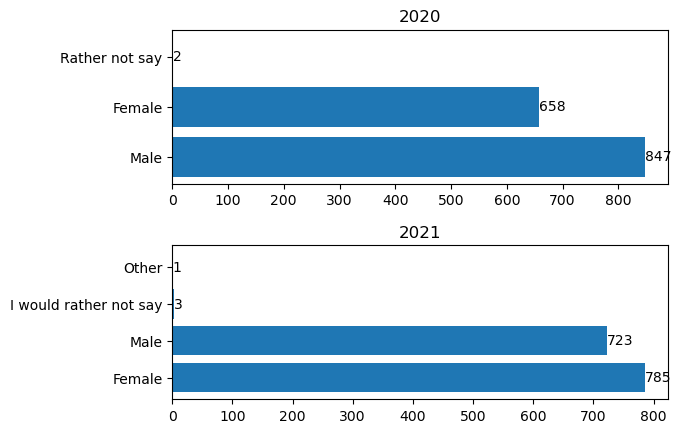

In [81]:
s_gender_2020 = rw_2020['What is your gender?'].value_counts()
s_gender_2021 = rw_2021['What is your gender?  '].value_counts()

fig, (ax1,ax2) = plt.subplots(2)

bar1 = ax1.barh(s_gender_2020.keys(), s_gender_2020.values)
bar2 = ax2.barh(s_gender_2021.keys(), s_gender_2021.values )
ax1.bar_label(bar1)
ax2.bar_label(bar2)
ax1.set_title('2020')
ax2.set_title('2021')
fig.subplots_adjust(hspace = 0.4)

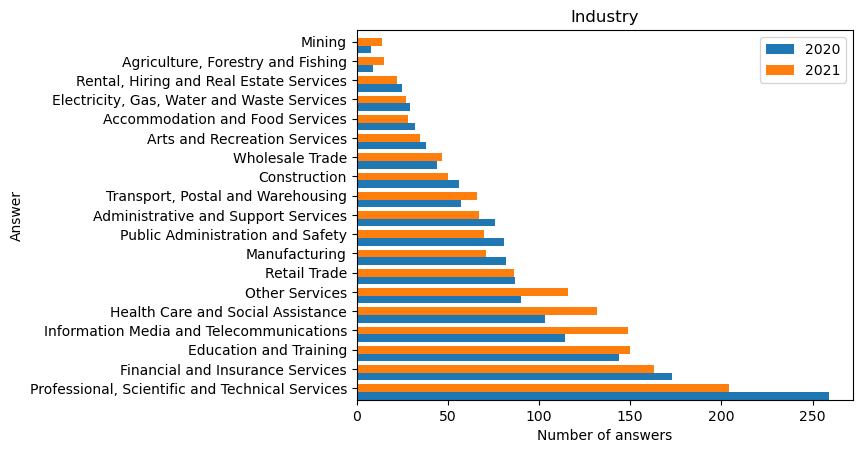

In [82]:
index = np.arange(19)
bar_width = 0.4

s_industry_2020 = rw_2020['Which of the following best describes your industry?'].value_counts()
s_industry_2021 = rw_2021['Which of the following best describes your industry?  '].value_counts()

fig, ax = plt.subplots()
ax.barh(index, s_industry_2020.values, bar_width ,label='2020')
plt.barh(index+bar_width ,s_industry_2021.values,bar_width, label = '2021')

plt.ylabel('Answer')
plt.xlabel('Number of answers')
plt.title('Industry')
ax.set(yticks=index + bar_width, yticklabels=s_industry_2020.keys(), ylim=[2*bar_width - 1, len(index)])
ax.legend()
plt.show()

### After looking at both datasets, I have a few comment:
* The number of female and male is distrubted well on both 2020 and 2021, especially 2021
* Good variety of industries

The next step is to look for the same questions asked in both 2020 and 2021, this way we can compare how different in the number of the answers

### Questions asked in 2020

In [83]:
for i in rw_2020.columns:
    print(i)

Response ID
What year were you born?
What is your gender?
Which of the following best describes your industry?
Which of the following best describes your industry? (Detailed)
Which of the following best describes your current occupation?
Which of the following best describes your current occupation? (Detailed)
How many people are currently employed by your organisation?
Do you manage people as part of your current occupation?
Which of the following best describes your household?
How long have you been in your current job?
Metro / Regional
Thinking about your current job, how much of your time did you spend remote working last year?
Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - My organisation encouraged people to work remotely
Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - My organisation was well prepared for me to work remotely
Thinking about remote worki

### Questions asked in 2021

In [84]:
for i in rw_2021.columns:
    print(i)

Response ID
What year were you born?  
What is your gender?  
How long have you been in your current job?  If you have more than one job, please answer all questions for your main job.  
Which of the following best describes your industry?  
Which of the following best describes your current occupation?  
How many people are currently employed by your organisation?   
Which of the following best describes your household?  
Metro or Regional
Thinking about your current job, how much of your work time did you spend working remotely in the last quarter of last year?   This means October-December 2020  If you work a 5 day week, each day of remote working equals 20% of your time.  
How much of your work time would you have preferred to work remotely during the last quarter of last year?   This means October-December 2020  If you work a 5 day week, each day of remote working equals 20% of your time.  
Thinking about your current job, how much of your work time have you spent working remotely

#### After carefully reviewed both datasets, I have recognized that the common questions they have start with: 
* Imagine that COVID-19 is cured or eradicated
 

In [85]:
rw_2020_copy = rw_2020.copy()
rw_2021_copy = rw_2021.copy()

#### Imagine that COVID-19 is cured or eradicated.  How likely would you consider the following statements? - My employer would encourage more remote working

The answers are worded different, so I change them
For example, *Somewhat likely* -> *Somewhat agree*

In [86]:
s_2020 = rw_2020_copy['Imagine that COVID-19 is cured or eradicated.  How likely would you consider the following statements? - My employer would encourage more remote working'].value_counts()
s_2021 = rw_2021_copy['Imagine that COVID-19 is cured or eradicated.    How likely would you consider the following statements?   - My employer would encourage more remote working'].value_counts()


Text(1.0, -0.1, 'My employer would encourage more remote working')

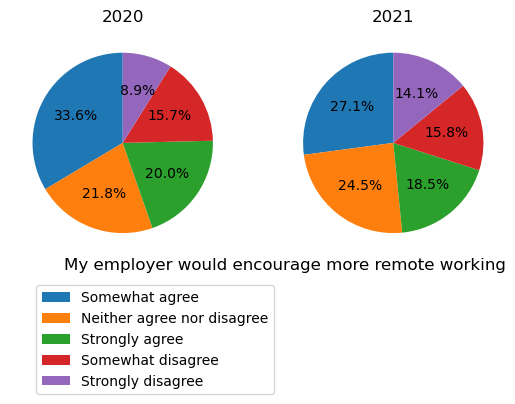

In [87]:
fig, (ax1,ax2) = plt.subplots(1,2)
pct1 = [round((i/ sum(s_2020.values))*100,2) for i in s_2020.values]
pct2 = [round((i/ sum(s_2021.values))*100,2) for i in s_2021.values]

ax1.pie(pct1,  autopct='%1.1f%%', startangle=90)
ax2.pie(pct2,  autopct='%1.1f%%', startangle=90)

ax1.set_title('2020')
ax2.set_title('2021')
plt.legend(loc = 0, labels = s_2020.keys(),bbox_to_anchor=(0,-0.1))
plt.title('My employer would encourage more remote working', loc='right', y=-0.1)

#### Imagine that COVID-19 is cured or eradicated.    How likely would you consider the following statements?   - My employer would make changes to support remote working

Text(1.0, -0.1, 'My employer would make changes to support remote working')

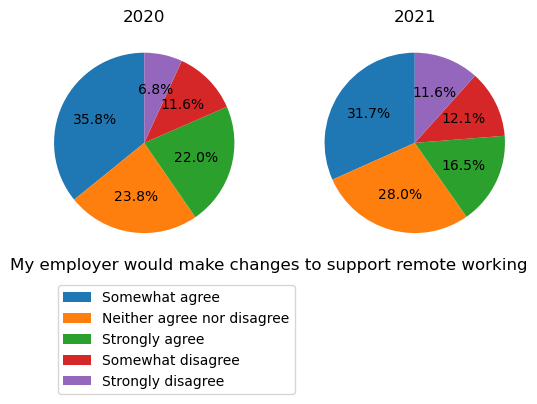

In [88]:
s_2020 = rw_2020_copy['Imagine that COVID-19 is cured or eradicated.  How likely would you consider the following statements? - My employer would make changes to support remote working'].value_counts()
s_2021 = rw_2021_copy['Imagine that COVID-19 is cured or eradicated.    How likely would you consider the following statements?   - My employer would make changes to support remote working'].value_counts()

s_2021['Somewhat agree'] = s_2021['Somewhat likely']
s_2021['Neither agree nor disagree'] = s_2021['Neither unlikely or likely']
s_2021['Strongly agree'] = s_2021['Very likely']
s_2021['Somewhat disagree'] = s_2021['Somewhat unlikely']
s_2021['Strongly disagree'] = s_2021['Very unlikely']
del s_2021['Somewhat likely']
del s_2021['Neither unlikely or likely']
del s_2021['Very likely']
del s_2021['Somewhat unlikely']
del s_2021['Very unlikely']

import math
fig, (ax1,ax2) = plt.subplots(1,2)
pct1 = [round((i/ sum(s_2020.values))*100,2) for i in s_2020.values]
pct2 = [round((i/ sum(s_2021.values))*100,2) for i in s_2021.values]

ax1.pie(pct1,  autopct='%1.1f%%', startangle=90)
ax2.pie(pct2,  autopct='%1.1f%%', startangle=90)

ax1.set_title('2020')
ax2.set_title('2021')
plt.legend(loc = 0, labels = s_2020.keys(),bbox_to_anchor=(0,-0.1))
plt.title('My employer would make changes to support remote working', loc='right', y=-0.1)


#### Imagine that COVID-19 is cured or eradicated.    How likely would you consider the following statements?   - I would have more choice about whether I work remotely

Text(1.0, -0.1, 'I would have more choice about whether I work remotely')

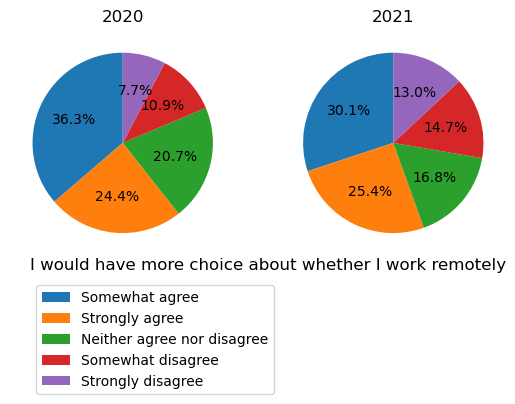

In [89]:
s_2020 = rw_2020_copy['Imagine that COVID-19 is cured or eradicated.  How likely would you consider the following statements? - I would have more choice about whether I work remotely'].value_counts()
s_2021 = rw_2021_copy['Imagine that COVID-19 is cured or eradicated.    How likely would you consider the following statements?   - I would have more choice about whether I work remotely'].value_counts()

s_2021['Somewhat agree'] = s_2021['Somewhat likely']
s_2021['Neither agree nor disagree'] = s_2021['Neither unlikely or likely']
s_2021['Strongly agree'] = s_2021['Very likely']
s_2021['Somewhat disagree'] = s_2021['Somewhat unlikely']
s_2021['Strongly disagree'] = s_2021['Very unlikely']
del s_2021['Somewhat likely']
del s_2021['Neither unlikely or likely']
del s_2021['Very likely']
del s_2021['Somewhat unlikely']
del s_2021['Very unlikely']

import math
fig, (ax1,ax2) = plt.subplots(1,2)
pct1 = [round((i/ sum(s_2020.values))*100,2) for i in s_2020.values]
pct2 = [round((i/ sum(s_2021.values))*100,2) for i in s_2021.values]

ax1.pie(pct1,  autopct='%1.1f%%', startangle=90)
ax2.pie(pct2,  autopct='%1.1f%%', startangle=90)

ax1.set_title('2020')
ax2.set_title('2021')
plt.legend(loc = 0, labels = s_2020.keys(),bbox_to_anchor=(0,-0.1))
plt.title('I would have more choice about whether I work remotely', loc='right', y=-0.1)

### Comments on the pie chars

### My employer would encourage more remote working

* In 2020, 53.6% agreed that their employers encourage them to do more remote working, but there number went down to 40.3% (2021) even though there are more people were surveyed this time, and number of people who disagreed goes up from 24.6% (2020) to 32.6% (2021)

### My employer would make changes to support remote working

* This pie chart has the same thing going on, the number of people who agreed that their employers would make changes to support remote working went down from 57.8% (2020) to 48.2% (2021), and number of people who disagreed went up from 18.4% (2020) to 23.7% (2021)

### I would have more choice about whether I work remotely

* 60.7% (2020) people agreed on this statement, but the number has changed to 55.5% in 2021. As opposed to this trend, 27.7% (2021) number of people that disagreed and 18.6% in 2020.


Based on the survey of 1507 people (2020) and 1512 people (2021), we can see that physical office isn't disappearing since people are showing a negative reaction to remote working.

### Overview
* Number of flights has been increasing since **mid-2021** (This is when the number of flights gets back to where it was in 2019)!!!  Airbnb [2] reported that half of the nights booked on its platform are for stays of longer than seven days in the **third quarter of 2021**, and Guesty [3] said reservation for stays for 14 days or longer increased by 33% in **2021**. 

* From [1], many companies support remote working and blended work. However, based on the pie chart, the number of remote workers who agreed that their employers don't support remote working is going down, and number of remote workers who disagreed is going up

* Personally, I think there is a correlation between remote working and number of flights, but I don't have enough information/data to prove it. 

#### Reference
[1] Sam Kemmis. “Has Remote Work Changed the Travel Landscape?” NerdWallet, https://www.nerdwallet.com/article/travel/remote-work-travel.

[2] Airbnb. "The Biggest Trends for Summer 2021, According to New Report." Airbnb Newsroom, 24 May 2021, news.airbnb.com/2021-travel-report.

[3] Guesty. "Guesty Industry Report | Short-Term Rental Data and Trends." Guesty, www.guesty.com/short-term-rental-ecosystem-industry-report. 

[4] PhocusWire. “Google Data Highlights Growing Interest in Blended Trips.” PhocusWire, PhocusWire, 18 Nov. 2022, https://www.phocuswire.com/google-data-highlights-growing-interest-in-blended-trips.